In [118]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Partie 1:

In [119]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [120]:
ventes ="/kaggle/input/ventes/ventes.xls"
column_names = ['MT', 'RG', 'PRIX', 'BR', 'INV', 'PUB', 'FV', 'TPUB', 'VENTES']
data=pd.read_excel(ventes,sheet_name="VENTES.TRAIN",names=column_names )
test=pd.read_excel(ventes,sheet_name="VENTES.TEST",names=column_names )
print(data.head())

    MT   RG  PRIX  BR  INV  PUB   FV  TPUB  VENTES
0  369  118    59   9   17   89  177   225    5439
1  476  138    71  18    4   63  279   206    5149
2  432  152    73  16  -50   16  245   309    4704
3  418  135    79  35  142   74  270    83    5036
4  383  104    60  21  -45   32  201   298    4110


In [121]:
Echelle=MinMaxScaler()
nvdata=Echelle.fit_transform(data)
nvdata = pd.DataFrame(nvdata, columns=data.columns)
print(nvdata.head())

         MT        RG  PRIX        BR       INV       PUB        FV      TPUB  \
0  0.353147  0.291667  0.08  0.037037  0.347150  0.948052  0.135294  0.447154   
1  0.727273  0.708333  0.56  0.370370  0.279793  0.610390  0.735294  0.395664   
2  0.573427  1.000000  0.64  0.296296  0.000000  0.000000  0.535294  0.674797   
3  0.524476  0.645833  0.88  1.000000  0.994819  0.753247  0.682353  0.062331   
4  0.402098  0.000000  0.12  0.481481  0.025907  0.207792  0.276471  0.644986   

     VENTES  
0  0.654867  
1  0.519795  
2  0.312529  
3  0.467163  
4  0.035864  


In [122]:
#instance du classifier Kmeans avec k=2
kmeans=KMeans(n_clusters=2)
#ajuster k means
kmeans.fit(data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [123]:
centroids = kmeans.cluster_centers_
print("\nCentroides :")
print(pd.DataFrame(centroids, columns=data.columns))


Centroides :
      MT          RG       PRIX         BR        INV        PUB          FV  \
0  467.0  123.000000  71.200000  22.000000  57.000000  81.000000  260.000000   
1  382.0  137.384615  67.153846  19.230769  25.846154  48.846154  214.230769   

    TPUB       VENTES  
0  283.6  5813.400000  
1  245.0  4756.076923  


In [124]:
labels = kmeans.labels_
print("\n Labels :")
print(labels)


 Labels :
[0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1]


In [125]:
#prédire le cluster pour un nouveau individu (exemple):
nv_indiv = [[580, 150, 50, 12, 18, 90, 190, 300, 4200]] 
predicted_label = kmeans.predict(scaler.transform(nv_indiv))
print("\n Cluster prédit pour le nouvel individu :", predicted_label[0])


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



 Cluster prédit pour le nouvel individu : 1


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

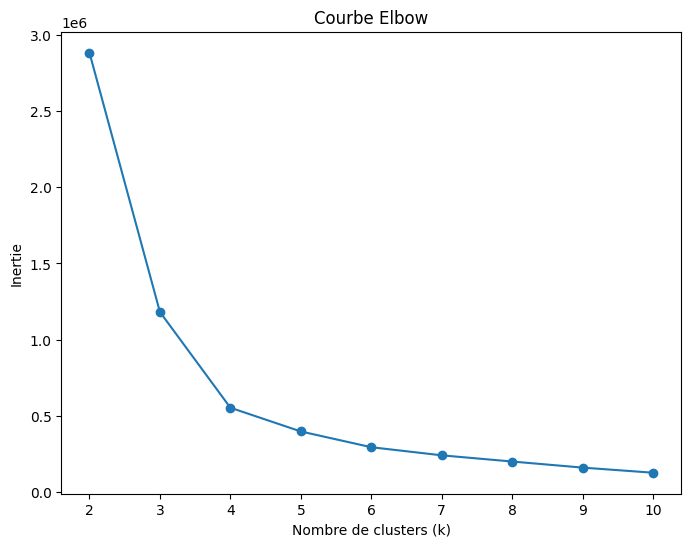

In [126]:
inertie = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertie.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Courbe Elbow')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.show()

In [127]:
#on remarque que à k=4 la courbe stagne un peu alors 4 est le nombre de clusters idéal

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

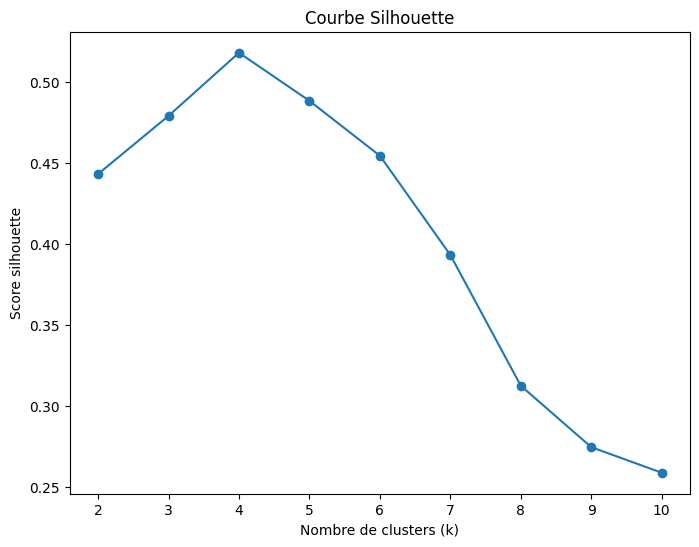

In [128]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Courbe Silhouette')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score silhouette')
plt.show()

A k=4 le score silhouette est maximal alors le k idéal est 4

In [129]:
#reajuster kmeans avec k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(nvdata)
new_labels = kmeans.labels_
print("\n Nouvelle segmentation avec k=4 :")
print(new_labels)


 Nouvelle segmentation avec k=4 :
[3 0 2 0 1 0 2 1 3 0 3 0 2 0 2 1 3 2]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [130]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    silhouette_m = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(silhouette_m)

# Trouver le k avec le score silhouette maximal
meill_k = np.argmax(silhouette_scores) + 2  # +2 car nous avons commencé la boucle à partir de k=2

print(f"Le meilleur nombre de clusters trouvé par le score silhouette est : {meill_k}")

Le meilleur nombre de clusters trouvé par le score silhouette est : 4


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

#  **partie 2**

In [131]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

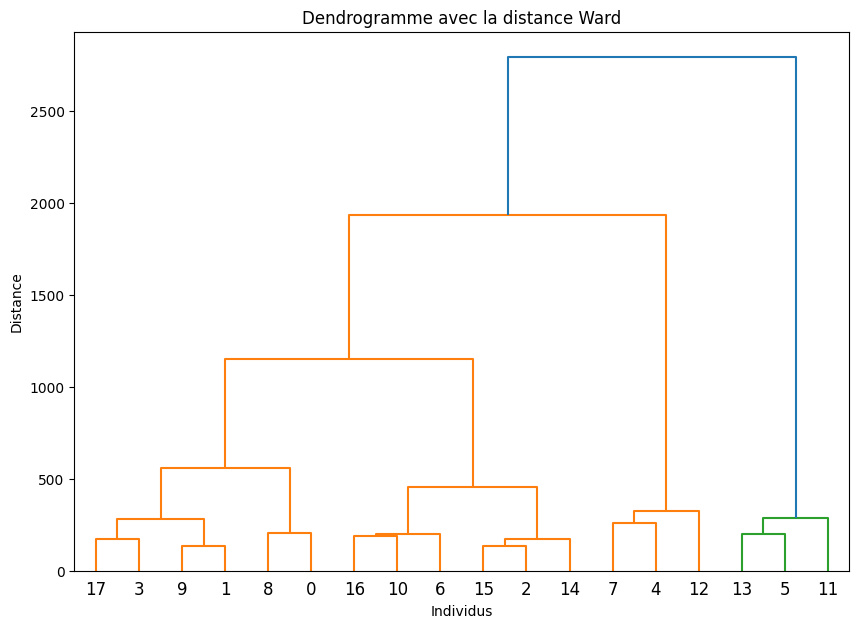

In [132]:
#créer un dendrogramme avec la distance Ward et l'afficher
linked = linkage(data, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogramme avec la distance Ward')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

In [133]:
#Créer une instance du classifieur AgglomerativeClustering avec k=4
agg_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')


In [134]:
#ajuster agglomerativeClustering
agg_cluster.fit(data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [135]:
#determiner les clusters pour chaque indiv
cluster_labels=agg_cluster.labels_ 
print("Labels des clusters pour chaque individu: \n")
print(cluster_labels)

Labels des clusters pour chaque individu: 

[0 0 1 0 2 3 1 2 0 0 1 3 2 3 1 1 1 0]


In [136]:
#afficher la courbe silhouette en faisant varier le k de 2 à 10
silhouette_scores = []
for k in range(2, 11):
    agg_cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    cluster_labels = agg_cluster.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

In [137]:
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 car on commence la boucle à partir de k=2


In [138]:
print(f"Le meilleur k trouvé par la courbe silhouette est : {best_k}")


Le meilleur k trouvé par la courbe silhouette est : 2


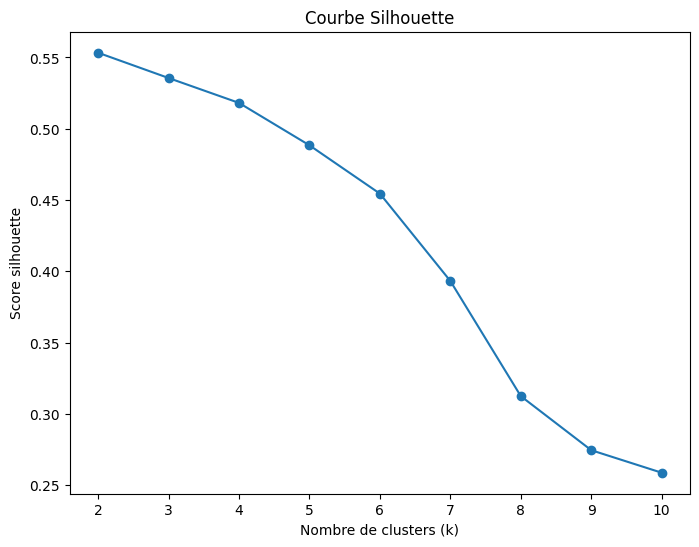

In [139]:
# Tracer la courbe silhouette
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Courbe Silhouette')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score silhouette')
plt.show()